#### Importing Libs

In [1]:
import pandas as pd
from decouple import config
from core.utils import UtilsEDA

#### Load Var Envs

In [2]:
RAW_DATA = config("RAW_DATA")

#### Load data

In [3]:
df_name = pd.read_csv(RAW_DATA+"CBO\\ocupacao.csv", encoding="latin-1", sep=';')
df_tmp_knowledge = pd.read_excel(RAW_DATA+"QBQ\\QBQ.xlsx", sheet_name="Conhecimento I")
df_tmp_knowledge_ = pd.read_excel(RAW_DATA+"QBQ\\QBQ.xlsx", sheet_name="Conhecimento II")

#### Processing Data

In [4]:
# Drop columns with load error
df_tmp_knowledge_.drop(columns=["codConhecimento.1", "desConhecimento.1"], inplace=True)
# Concat dataframes in a unique
df_tmp_knowledge = pd.concat([df_tmp_knowledge, df_tmp_knowledge_], axis=0)
# Create dataframe with data that we use
df_knowledge = df_tmp_knowledge[["CodCBO", "desArea", "desCampo", "desConhecimento", "Profundidade", "Frequencia", "Importancia"]]
# Rename columns 'df_knowledge'
df_knowledge.columns = ["codCBO", "area", "field", "knowledge", "proof", "frequency", "importance"]
# Merge data
df_knowledge = df_knowledge.merge(df_name, how='left', left_on="codCBO", right_on="CODIGO").rename(columns={"TITULO":"role"})
# Drop columns that we not use
df_knowledge.drop(columns='CODIGO', inplace=True)

In [18]:
print(f"Quantidade de áreas do conhecimento: {len(df_knowledge['area'].unique())}")
print()
print(f"Quantidade de campos do conhecimento: {len(df_knowledge['field'].unique())}")

Quantidade de áreas do conhecimento: 25

Quantidade de campos do conhecimento: 275


#### Processing data to dashboard

In [5]:
datadict = UtilsEDA.create_datadict(dataframe=df_knowledge)
# Create dataframe to dashboard
data_dash = UtilsEDA.create_dataframe_to_dashboard(datadict=datadict)

#### Testing method to plot

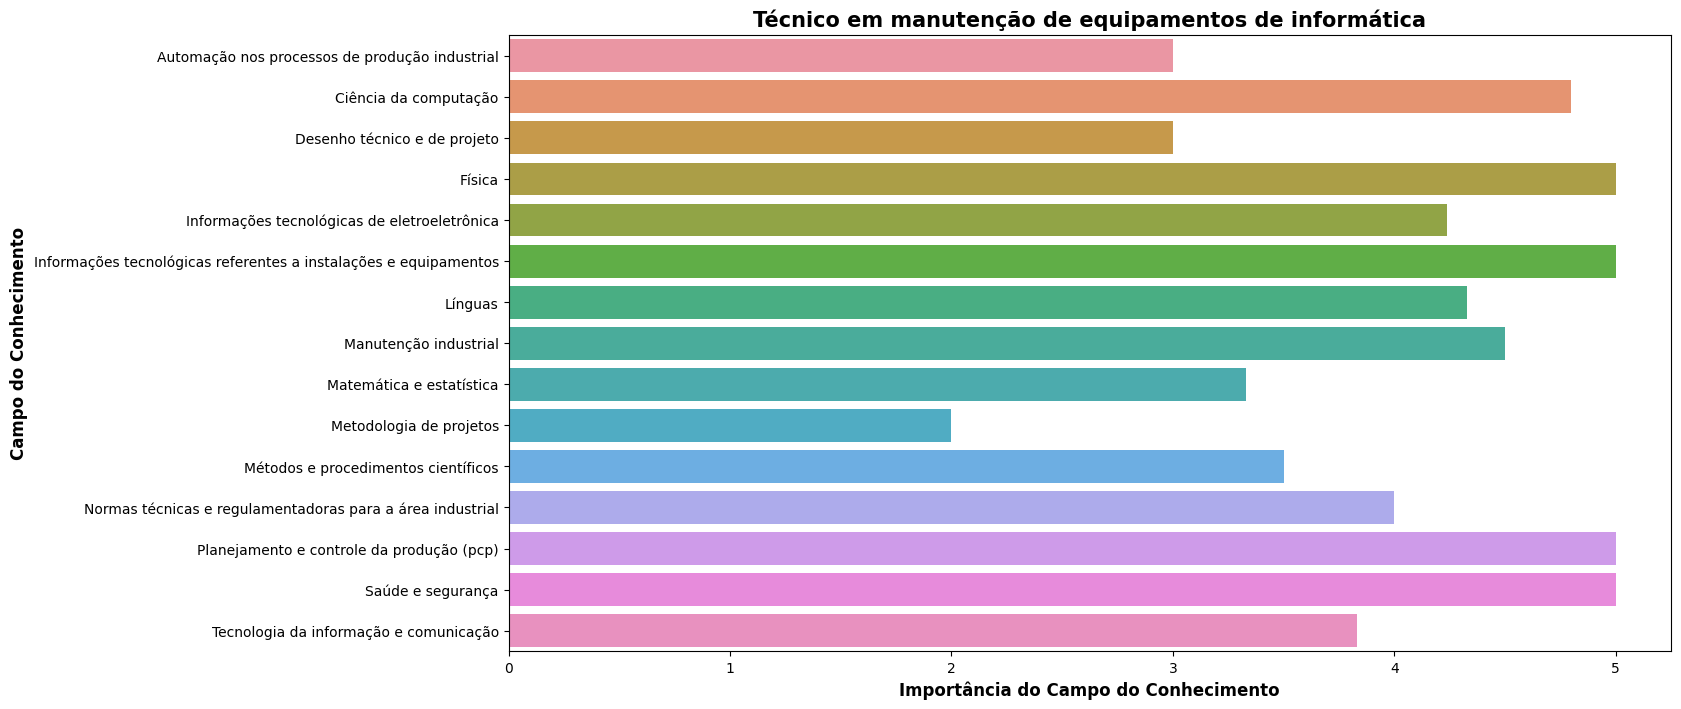

In [6]:
UtilsEDA.plotting_graph(dataframe=data_dash, code=313220)

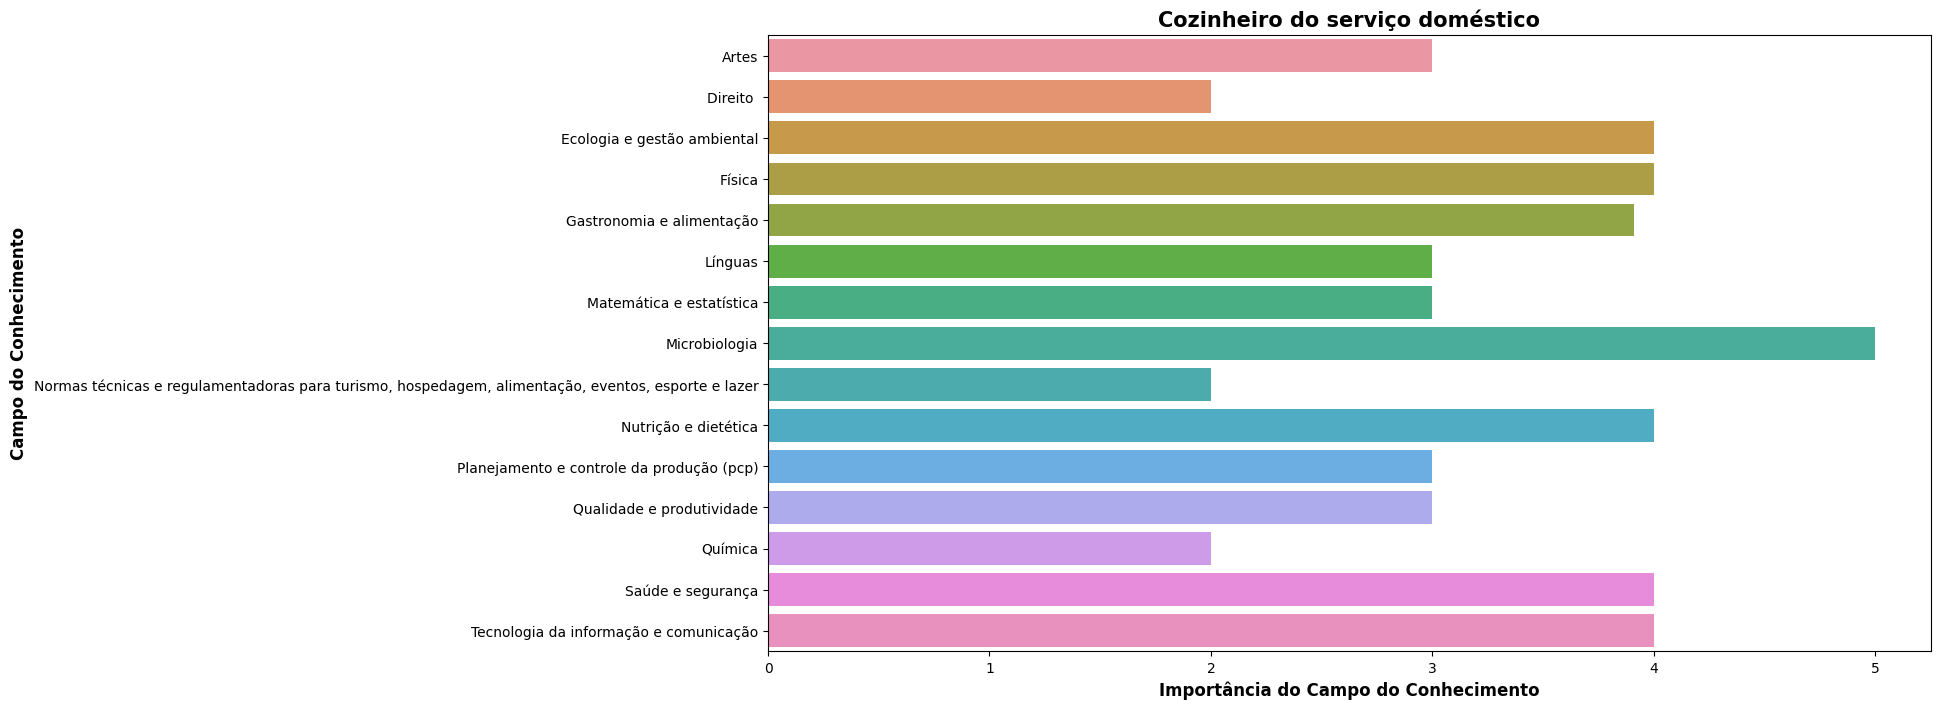

In [7]:
UtilsEDA.plotting_graph(dataframe=data_dash, code=513210)

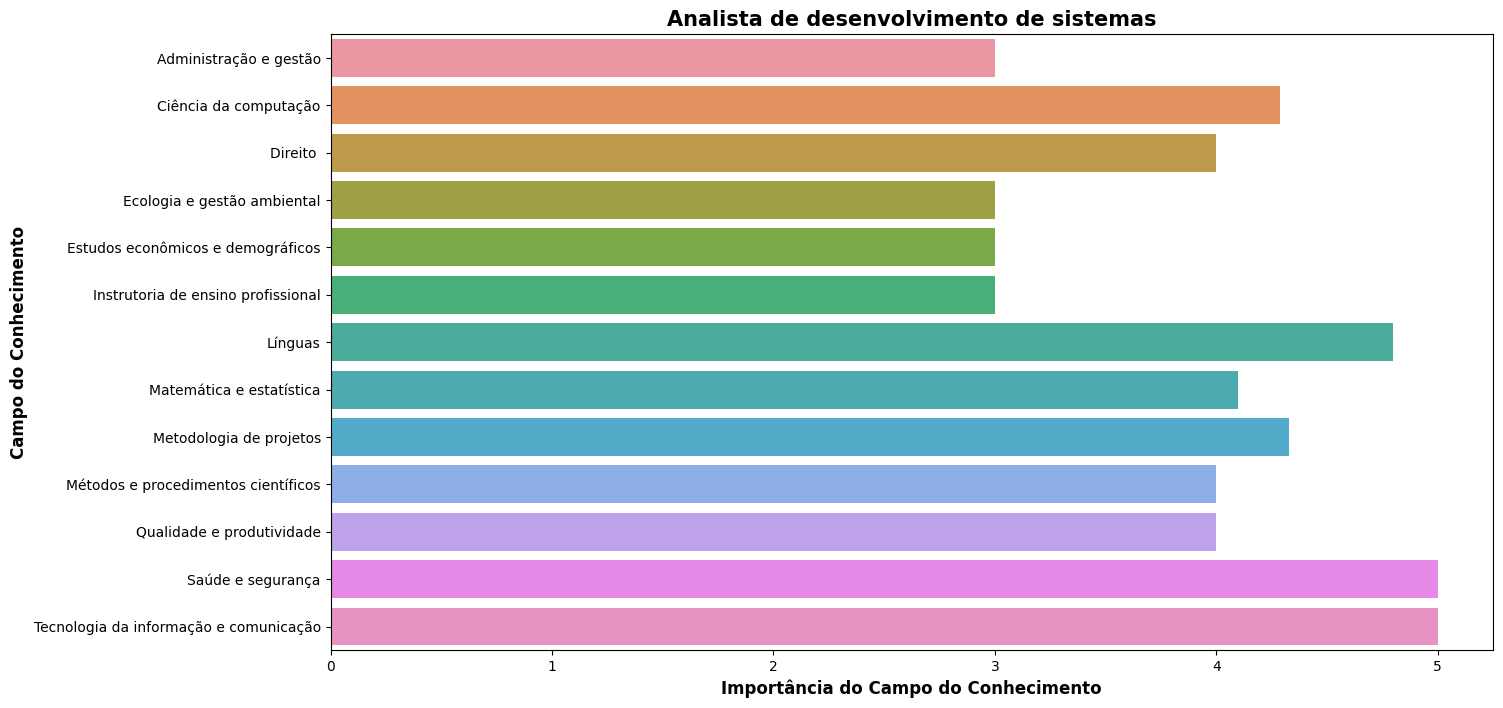

In [8]:
UtilsEDA.plotting_graph(dataframe=data_dash, code=212405)

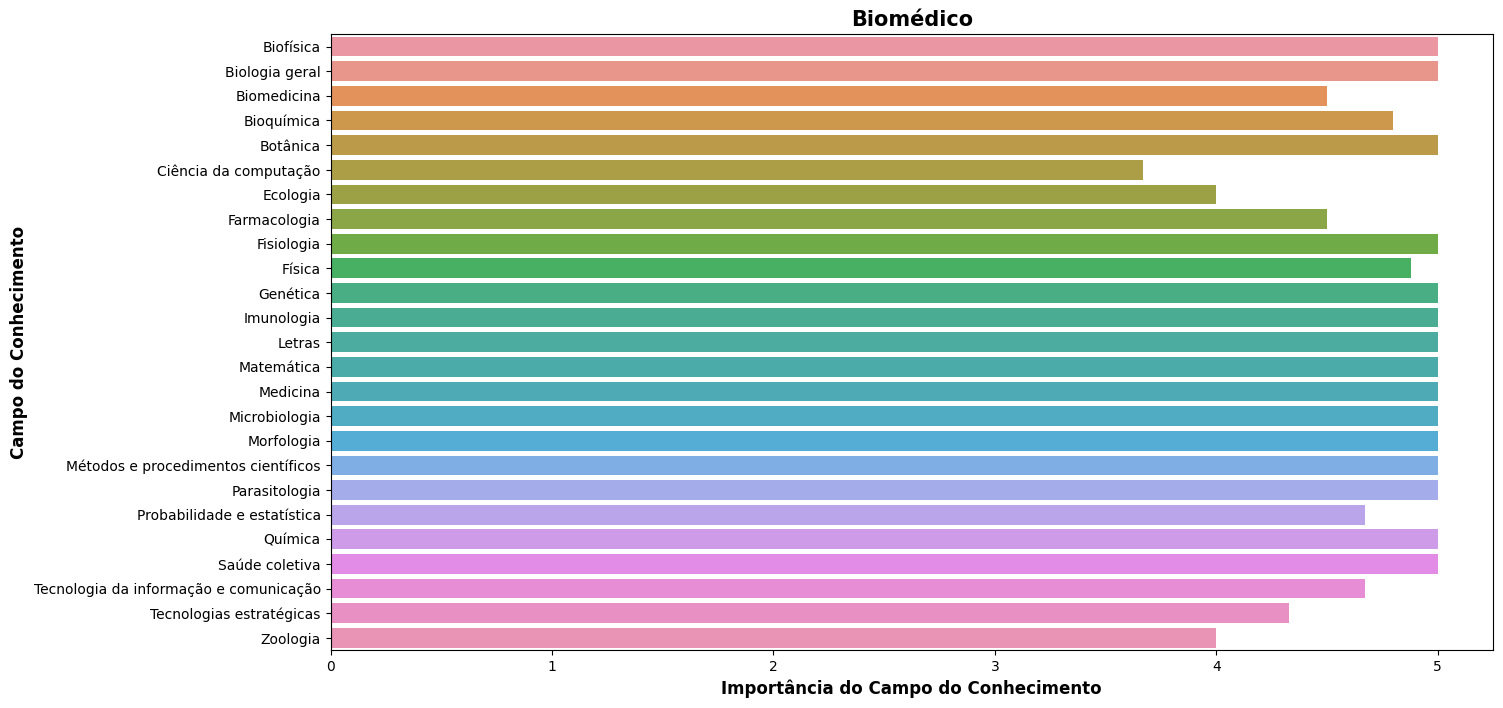

In [20]:
UtilsEDA.plotting_graph(dataframe=data_dash, code=221205)